# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
def read_dataSet(dataSet_path):
    return pd.read_csv(dataSet_path + "green_tripdata_2016-01.csv")

In [3]:
dataSet_path = "./"
df = read_dataSet(dataSet_path)

In [4]:
df.head()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2016-01-01 00:17:40,2016-01-01 00:36:15,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",1.0,8.46,25.5,0.5,0.5,30.00,0.0,NaN,0.3,56.80,Credit card,Street-hail,NaN
1,VeriFone Inc.,2016-01-01 00:47:37,2016-01-01 01:18:37,N,Standard rate,"Brooklyn,Gowanus","Brooklyn,Bushwick North",1.0,5.84,23.0,0.5,0.5,4.86,0.0,NaN,0.3,29.16,Credit card,Street-hail,NaN
2,VeriFone Inc.,2016-01-01 00:15:19,2016-01-01 00:24:27,N,JFK,"Queens,Sunnyside","Queens,Woodside",1.0,1.55,52.0,NaN,0.5,0.00,0.0,NaN,0.3,52.80,Cash,Street-hail,NaN
3,VeriFone Inc.,2016-01-01 00:40:30,2016-01-01 00:45:42,N,Standard rate,"Queens,Sunnyside","Queens,Woodside",1.0,0.88,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,Cash,Street-hail,NaN
4,VeriFone Inc.,2016-01-01 00:53:43,2016-01-01 01:43:47,N,Standard rate,"Queens,Sunnyside","Manhattan,East Village",2.0,9.06,37.0,0.5,0.5,0.00,0.0,NaN,0.3,38.30,Cash,Street-hail,NaN


In [5]:
df.tail()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
1445296,VeriFone Inc.,2016-01-18 16:35:56,2016-01-18 16:48:53,N,Standard rate,"Manhattan,East Harlem South","Manhattan,Morningside Heights",1.0,2.05,10.5,1.0,0.5,3.08,0.00,NaN,0.3,15.38,Credit card,Street-hail,NaN
1445297,VeriFone Inc.,2016-01-25 07:30:34,2016-01-25 07:53:31,N,Standard rate,"Manhattan,East Harlem North","Queens,Long Island City/Hunters Point",1.0,5.35,19.0,NaN,0.5,0.00,0.00,NaN,0.3,19.80,Cash,Street-hail,NaN
1445298,"Creative Mobile Technologies, LLC",2016-01-17 02:44:04,2016-01-17 02:49:13,N,Standard rate,"Queens,Astoria","Queens,Astoria",1.0,0.60,5.0,0.5,0.5,1.25,0.00,NaN,0.3,7.55,Credit card,Street-hail,NaN
1445299,VeriFone Inc.,2016-01-30 00:54:27,2016-01-30 01:08:40,N,Standard rate,"Manhattan,Manhattanville","Bronx,Morrisania/Melrose",1.0,3.70,13.5,0.5,0.5,0.00,0.00,NaN,0.3,14.80,Credit card,Street-hail,NaN
1445300,VeriFone Inc.,2016-01-09 22:27:44,2016-01-09 22:50:54,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Manhattan,Murray Hill",1.0,5.48,20.0,0.5,0.5,0.00,5.54,NaN,0.3,26.84,Cash,Street-hail,NaN


# 2- EDA

In [6]:
# Unique Values
unique_vals = pd.DataFrame(df.nunique(), columns=['Num of Unique Values'])
display(unique_vals)

,Num of Unique Values
Vendor,2
lpep pickup datetime,1044828
lpep dropoff datetime,1043114
store and fwd flag,2
Rate type,7
PU Location,230
DO Location,259
passenger count,10
trip distance,3195
fare amount,1106


In [7]:
# Shape
display("Shape of the Dataframe:")
display(df.shape)

'Shape of the Dataframe:'

(1445301, 20)

In [8]:
# Info
display("Info of the Dataframe:")
display(df.info())

'Info of the Dataframe:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445301 entries, 0 to 1445300
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Vendor                 1445301 non-null  object 
 1   lpep pickup datetime   1445301 non-null  object 
 2   lpep dropoff datetime  1445301 non-null  object 
 3   store and fwd flag     1445301 non-null  object 
 4   Rate type              1445301 non-null  object 
 5   PU Location            1445301 non-null  object 
 6   DO Location            1445301 non-null  object 
 7   passenger count        1444890 non-null  float64
 8   trip distance          1445301 non-null  float64
 9   fare amount            1445301 non-null  float64
 10  extra                  772840 non-null   float64
 11  mta tax                1445301 non-null  float64
 12  tip amount             1445301 non-null  float64
 13  tolls amount           1445301 non-null  float64
 14  ehail fee         

None

In [9]:
# Correlation
display("Correlation of Features:")
correlations = df.corr()
display(correlations)

'Correlation of Features:'

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
passenger count,1.000000,0.006017,0.008372,-0.013757,0.001210,0.002340,0.001697,NaN,0.001887,0.008460,NaN
trip distance,0.006017,1.000000,0.790408,-0.065611,-0.004175,0.338392,0.212592,NaN,0.008611,0.789582,NaN
fare amount,0.008372,0.790408,1.000000,0.004758,-0.077471,0.343481,0.176197,NaN,-0.060539,0.969442,NaN
extra,-0.013757,-0.065611,0.004758,1.000000,0.212456,-0.005241,0.001166,NaN,0.209612,0.030434,NaN
mta tax,0.001210,-0.004175,-0.077471,0.212456,1.000000,0.007879,-0.018008,NaN,0.962928,-0.051116,NaN
tip amount,0.002340,0.338392,0.343481,-0.005241,0.007879,1.000000,0.106943,NaN,0.013652,0.542298,NaN
tolls amount,0.001697,0.212592,0.176197,0.001166,-0.018008,0.106943,1.000000,NaN,-0.000563,0.276594,NaN
ehail fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement surcharge,0.001887,0.008611,-0.060539,0.209612,0.962928,0.013652,-0.000563,NaN,1.000000,-0.033383,NaN
total amount,0.008460,0.789582,0.969442,0.030434,-0.051116,0.542298,0.276594,NaN,-0.033383,1.000000,NaN


In [10]:
# Description
display("Description of Dataframe:")
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to avoid the scientific notation(to be more readable)
display(df.describe())

'Description of Dataframe:'

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
count,1444890.00,1445301.00,1445301.00,772840.00,1445301.00,1445301.00,1445301.00,0.00,1445301.00,1445301.00,2.00
mean,1.36,2.76,11.94,0.65,0.49,1.25,0.10,NaN,0.29,14.42,0.00
std,1.61,2.95,10.51,0.26,0.09,2.78,1.18,NaN,0.05,12.01,0.00
min,1.00,0.00,-492.80,-1.00,-0.50,-6.70,-30.00,NaN,-0.30,-497.50,0.00
25%,1.00,1.00,6.00,0.50,0.50,0.00,0.00,NaN,0.30,7.80,0.00
50%,1.00,1.80,9.00,0.50,0.50,0.00,0.00,NaN,0.30,11.16,0.00
75%,1.00,3.45,14.50,1.00,0.50,2.00,0.00,NaN,0.30,17.30,0.00
max,666.00,360.50,989.00,83.00,3.00,400.00,900.00,NaN,1.39,1000.80,0.00


## Insights from that Data Description:

### 1. **Passenger Count**:
- Most trips have only 1 passenger (mean is close to 1, and median is 1).
- The max value of 666 passengers seems highly unrealistic for a taxi and might be an error that needs investigation or correction.

### 2. **Trip Distance**:
- Average trip distance is 2.76 miles, but 50% of the trips are 1.8 miles or shorter.
- The maximum trip distance of 360.5 miles is unusually long for a taxi ride within a city.

### 3. **Fare Amount**:
- The average fare is around $11.94.
- There's a negative minimum fare (-492.80), which seems to be a data error or might represent refunds/adjustments.

### 4. **Extra**:
- Half of the rides seem to have an extra charge of 0.50, but there's a max value of 83, which seems quite high.

### 5. **MTA Tax**:
- The vast majority of rides have an MTA tax of 0.50, as indicated by the 25th, 50th, and 75th percentiles.

### 6. **Tip Amount**:
- The median tip is 0, suggesting that a significant number of rides have no tip. However, the average tip is $1.25, indicating that while many rides don't have tips, some have significant tip amounts.
- A max tip of 400 dollars might be an outlier or a very generous tip.

### 7. **Tolls Amount**:
- The vast majority of rides don't have toll charges, but some do go up to 900 dollars, which is very high and might be an error.

### 8. **Ehail Fee**:
- All entries are missing for this column. It might be worth considering dropping it if it's not relevant for the analysis.

### 9. **Improvement Surcharge**:
- Most rides have an improvement surcharge of 0.30.

### 10. **Total Amount**:
- The average total amount is 14.42, but 50 percent of rides are 11.16 or cheaper.
- Negative values might represent refunds or adjustments but need to be checked for data quality.

### 11. **Congestion Surcharge**:
- There are only 2 non-missing values, both of which are 0. This column might not be very informative if almost all its values are missing, therefore it could be worth dropping.

In [11]:
def check_index_candidate(df):
    potential_indices = []
    for column in df.columns:
        if df[column].nunique() == df.shape[0] and df[column].isnull().sum() == 0:
            potential_indices.append(column)
    if not potential_indices:
        return "No potential index candidates found. "
    else:
        return potential_indices

In [12]:
# Index Candidate(s), if any
display(check_index_candidate(df))

'No potential index candidates found. '

#### No feature has unique values for each entry and does not contain any missing values, therefore there are no candidates

In [13]:
# Correlation heatmap
def draw_correlation_Heatmap(df):
    plt.figure(figsize=(15,10))
    sns.heatmap(correlations, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

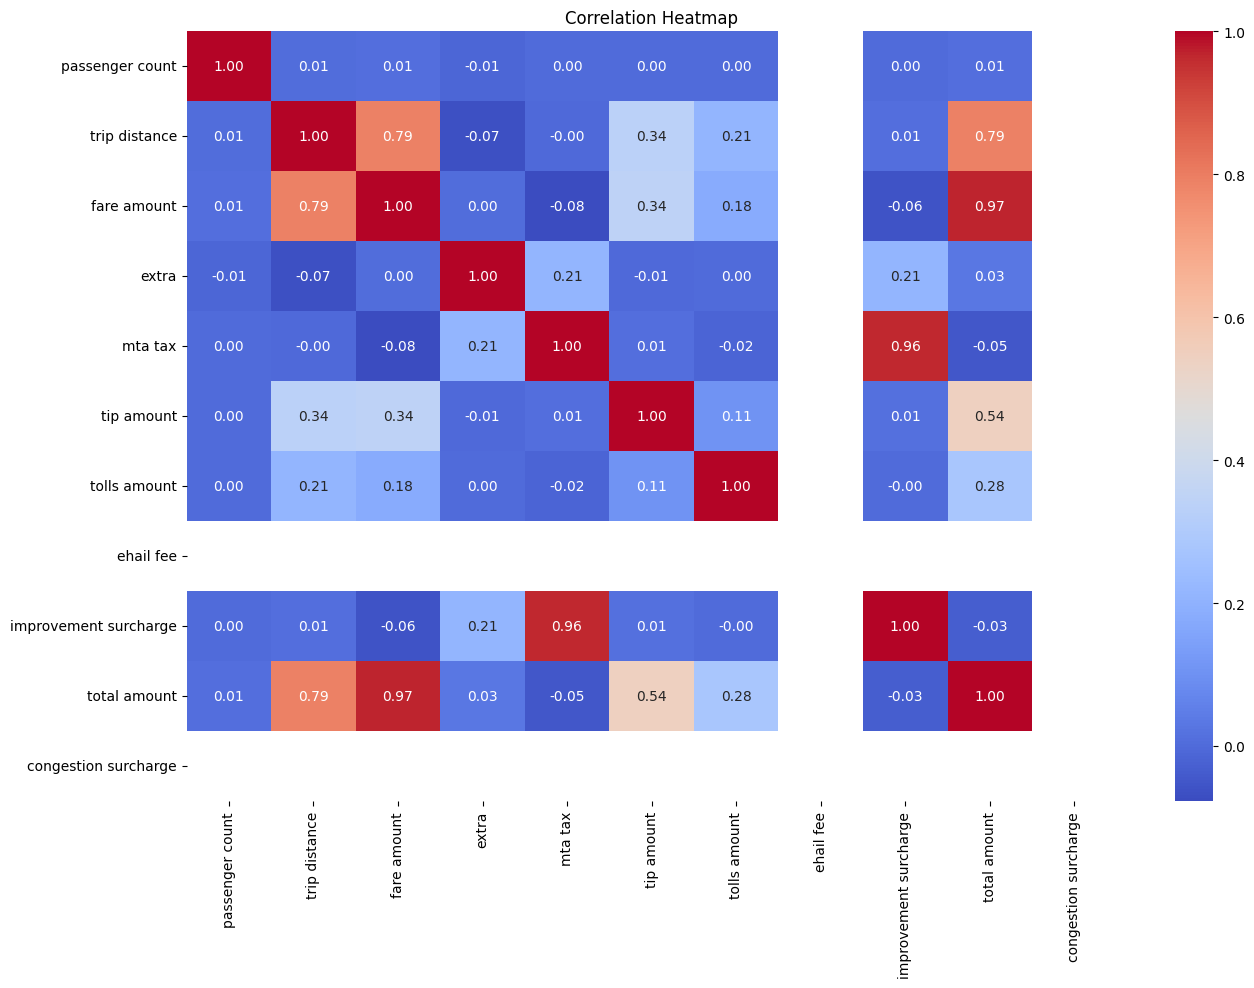

In [14]:
draw_correlation_Heatmap(df)

## More Insights

- There is a strong correlation between the trip distance both the total amount and the fare amount
- There is a very strong correlation between the mta tax and the improvement surcharge
- There is an medium correlation between the tip amount and the total amount

## Visualization Functions

In [15]:
def plot_histogram(df, feature, bins='auto', title=None):
    """
    Plots a histogram for the given feature.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, bins=bins)
    plt.title(title if title else f'Distribution of {feature}')
    plt.show()

def plot_density(df, feature, title=None):
    """
    Plots a density plot for the given feature.
    """
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature)
    plt.title(title if title else f'Density of {feature}')
    plt.show()

def plot_boxplot(df, feature, title=None):
    """
    Plots a boxplot for the given feature.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(title if title else f'Boxplot of {feature}')
    plt.show()
    
def plot_countplot(df, feature, title=None):
    """
    Plots a countplot for a categorical or discrete feature.
    """
    plt.figure(figsize=(10, 6))
    
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    
    plt.title(title if title else f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
def plot_scatter(df, x_feature, y_feature, title=None):
    """
    Plots a scatter plot for the given features.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_feature, y=y_feature)
    plt.title(title if title else f'Relationship between {x_feature} and {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()


## Questions & Visualization

### 1) What's the distribution of trip distances?

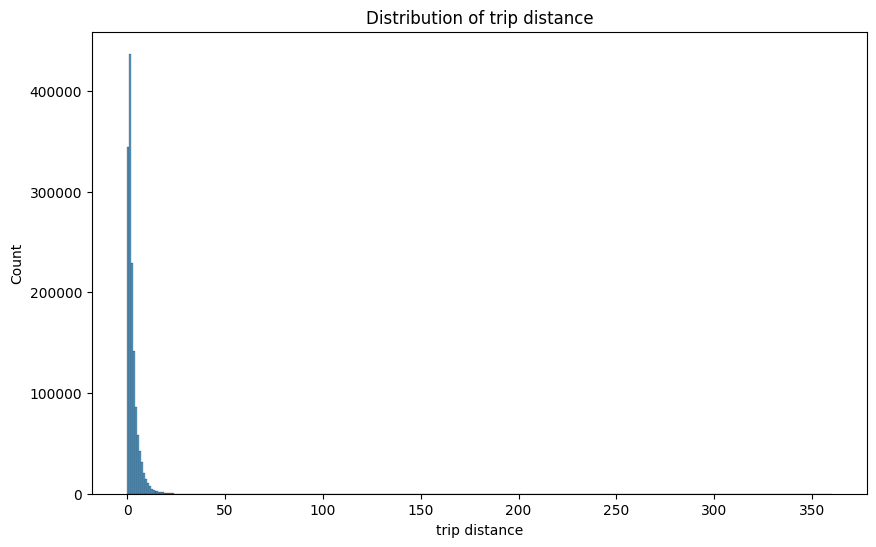

In [16]:
max_distance = int(df['trip distance'].max())
plot_histogram(df, 'trip distance', bins=range(0, max_distance + 1, 1))

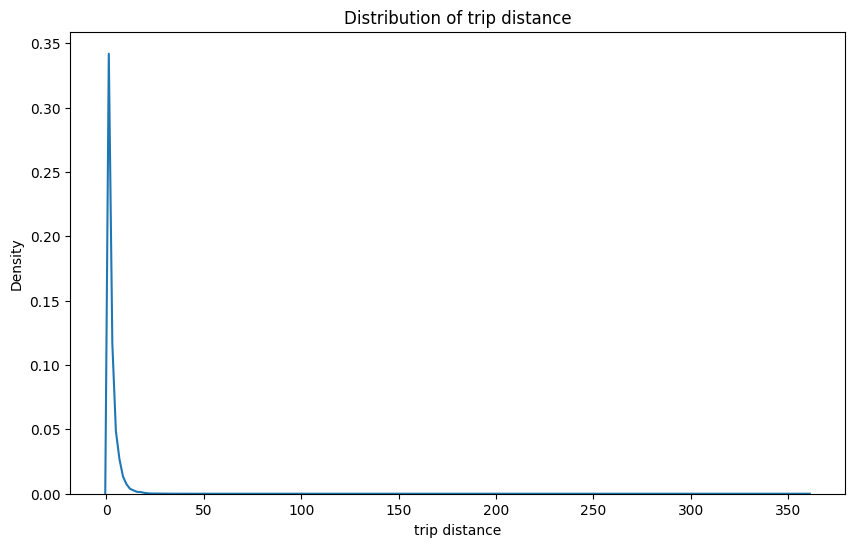

In [17]:
plot_density(df, 'trip distance', title= "Distribution of trip distance")

In [18]:
display((df["trip distance"]==0).sum())

20437

In [19]:
df[df["trip distance"]==0]

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
249,"Creative Mobile Technologies, LLC",2016-01-01 00:34:07,2016-01-01 00:34:07,N,Standard rate,"Queens,Astoria","Unknown,NV",1.00,0.00,27.00,0.50,0.50,0.00,0.00,NaN,0.30,28.30,Cash,Street-hail,NaN
378,VeriFone Inc.,2016-01-01 00:57:47,2016-01-01 00:58:04,N,Standard rate,"Bronx,Mott Haven/Port Morris","Bronx,Mott Haven/Port Morris",1.00,0.00,2.50,0.50,0.50,17.00,0.00,NaN,0.30,20.80,Credit card,Street-hail,NaN
450,VeriFone Inc.,2016-01-01 00:52:06,2016-01-01 00:55:29,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,-4.00,-0.50,-0.50,0.00,0.00,NaN,-0.30,-5.30,Dispute,Street-hail,NaN
451,VeriFone Inc.,2016-01-01 00:52:06,2016-01-01 00:55:29,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,4.00,0.50,0.50,0.00,0.00,NaN,0.30,5.30,Cash,Street-hail,NaN
774,VeriFone Inc.,2016-01-01 00:25:46,2016-01-01 00:25:52,N,Negotiated fare,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,4.00,NaN,0.00,1.20,0.00,NaN,0.00,5.20,Credit card,Dispatch,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444625,VeriFone Inc.,2016-01-31 23:46:27,2016-01-31 23:46:29,N,Standard rate,"Unknown,NV","Queens,Jamaica",1.00,0.00,2.50,0.50,0.50,0.00,0.00,NaN,0.30,3.80,Cash,Street-hail,NaN
1444822,"Creative Mobile Technologies, LLC",2016-01-31 23:00:59,2016-01-31 23:01:40,N,Negotiated fare,"Brooklyn,East New York","Brooklyn,East New York",1.00,0.00,40.00,NaN,0.00,0.00,0.00,NaN,0.00,40.00,NaN,Dispatch,NaN
1444953,VeriFone Inc.,2016-01-31 23:28:05,2016-01-31 23:28:44,N,Negotiated fare,"Brooklyn,Flatlands","Brooklyn,Flatlands",1.00,0.00,25.00,NaN,0.00,0.00,0.00,NaN,0.00,25.00,Cash,Dispatch,NaN
1445177,VeriFone Inc.,2016-01-31 23:08:15,2016-01-31 23:08:16,N,Negotiated fare,"Unknown,NV","Manhattan,Central Harlem North",1.00,0.00,12.00,NaN,0.00,0.00,0.00,NaN,0.00,12.00,Credit card,Dispatch,NaN


### Conclusion

The 2 graphs indicate that the distance is right skewed indicating that most trips are very short. Moreover in 20437 cases 0 distance was recorded which means that either the taximeter wasn't functioning or there could be instances where rides are started and stopped without a passenger, either mistakenly or intentionally, to meet daily trip targets or other reasons, or depending on the granularity of the recording system, very short trips (like those within a large complex or between adjacent buildings) might be rounded off to 0 which could be seen since the duration of most of those trips is very short.

### 2) What's the Passenger Count Distrubtion?


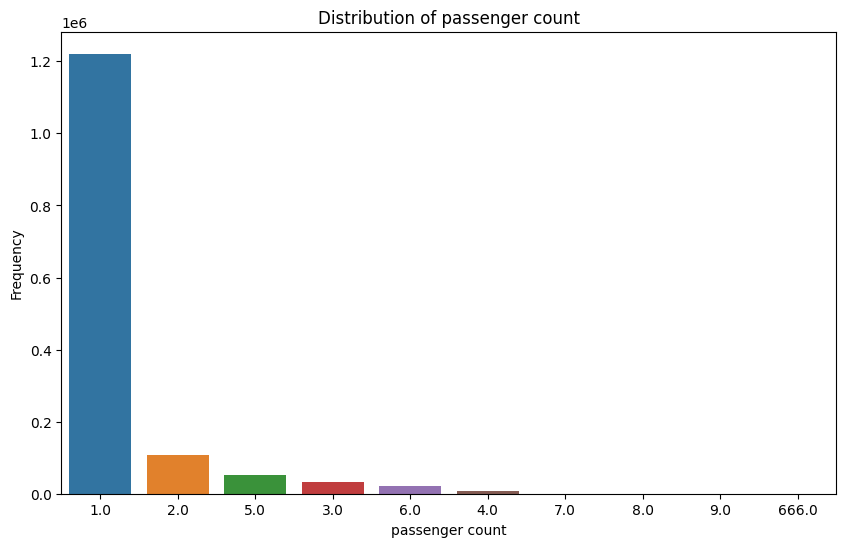

In [20]:
plot_countplot(df, 'passenger count')

In [21]:
df["passenger count"].value_counts()

1.00      1221029
2.00       106947
5.00        51973
3.00        33593
6.00        22629
4.00         8632
7.00           43
8.00           27
9.00           12
666.00          5
Name: passenger count, dtype: int64

### Conclusion

The Graph indicates that the majority of the trips have a single passenger, however the count of 666 passengers for 5 rides is highly unrealistic and likely represents data entry errors or system glitches. Such values should be further investigated and possibly cleaned or corrected. Moreover, counts of 7, 8, and 9 are extremely rare, with only 43, 27, and 12 rides respectively. These might represent special vehicles or possible data entry errors also.


### 3) What's the most popular Payment Type?

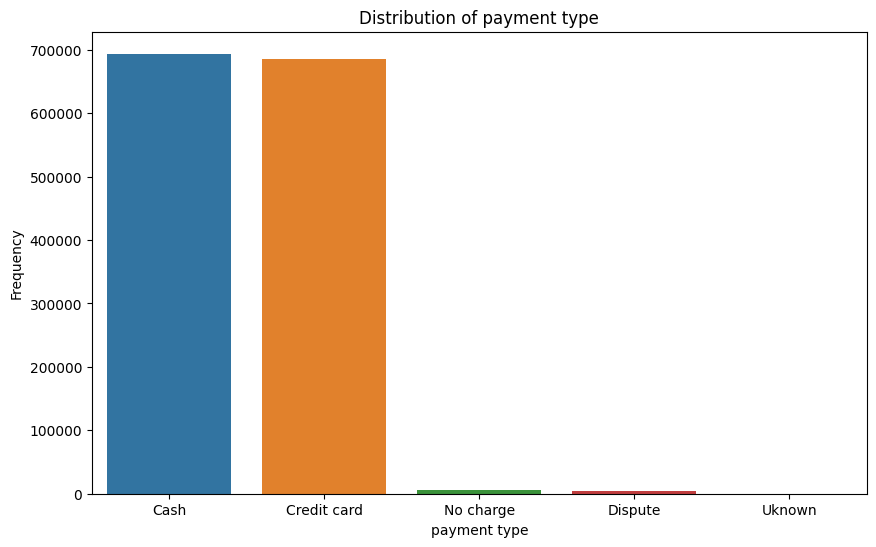

In [22]:
plot_countplot(df, 'payment type')

In [23]:
df["payment type"].value_counts()

Cash           693918
Credit card    685640
No charge        5316
Dispute          3834
Uknown             89
Name: payment type, dtype: int64

### Conclusion

Customers predominantly prefer cash and credit card. Uknown, indicating possible data entry errors or instances where the payment method was not captured accurately. Moreover, for Dispute it could be due to service dissatisfaction. Furthermore, for the No charge it could be due to promotions and discounts.

### 4) What's the relationship between the total amount and the tip amount?

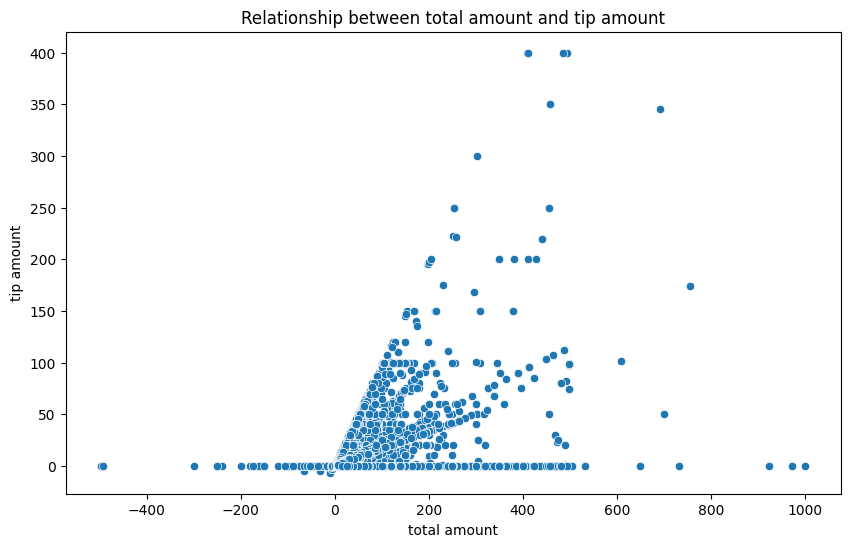

In [24]:
plot_scatter(df, 'total amount', 'tip amount')

### Conclusion

Based on the correlation heatmap and the scatter graph, it could be concluded that the total amount and the tip amount are highly correlated, as the total amount increases it could be seen that the passengers were more generous and the tip amount increased. However for some high total amount values indicated in the scatter graphs it could be seen that the tip amount was so low (or zero) which could mean that there was a service dissatisfaction or dispute. Moreover, most trips had no tip.

### 5) What's the distribution of Trip Fare?

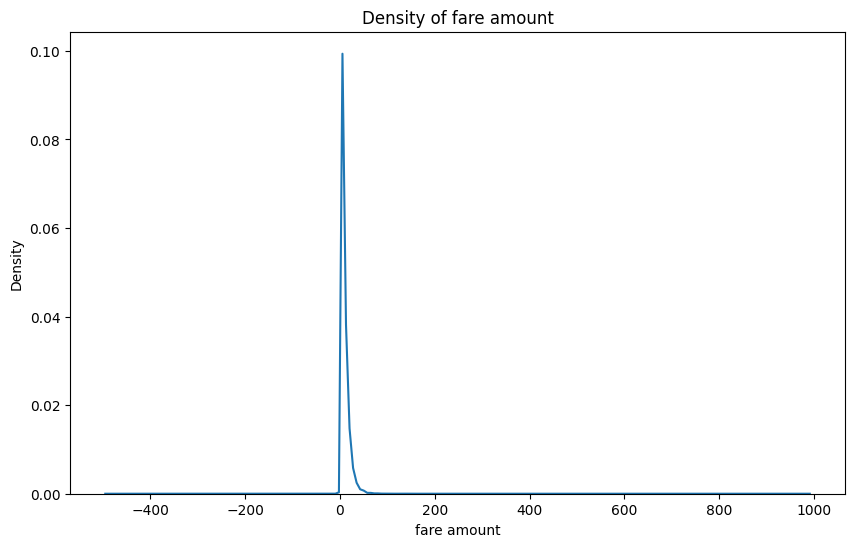

In [25]:
plot_density(df,"fare amount")

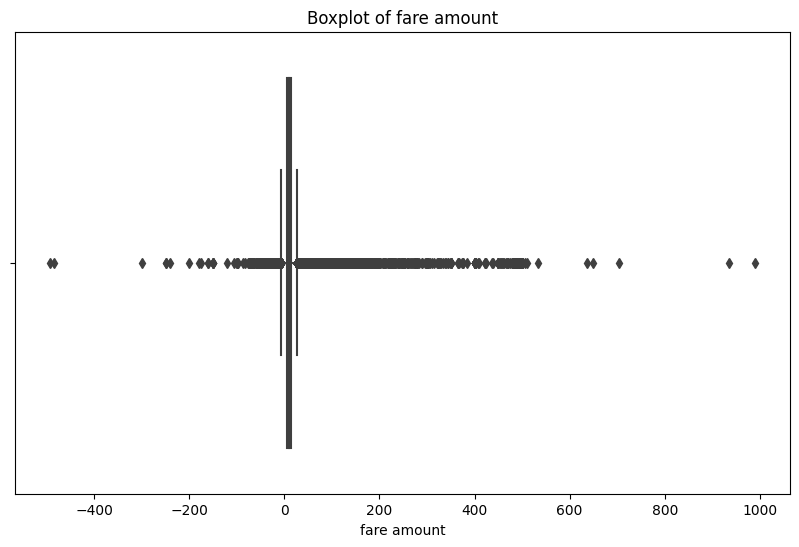

In [26]:
plot_boxplot(df,"fare amount")

In [27]:
display((df["fare amount"]==0).sum())
display((df["fare amount"]<0).sum())
display((df["fare amount"]>0).sum())
display((df["fare amount"]<200).sum())
df[df["fare amount"]<0]

3867

2977

1438457

1444997

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
450,VeriFone Inc.,2016-01-01 00:52:06,2016-01-01 00:55:29,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,-4.00,-0.50,-0.50,0.00,0.00,NaN,-0.30,-5.30,Dispute,Street-hail,NaN
683,VeriFone Inc.,2016-01-01 00:20:00,2016-01-01 00:20:28,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.05,-2.50,-0.50,-0.50,0.00,0.00,NaN,-0.30,-3.80,Dispute,Street-hail,NaN
1518,VeriFone Inc.,2016-01-01 00:23:27,2016-01-01 00:23:30,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.00,0.00,-70.00,NaN,0.00,0.00,0.00,NaN,0.00,-70.00,No charge,Dispatch,NaN
2162,VeriFone Inc.,2016-01-01 00:04:38,2016-01-01 00:05:02,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Williamsburg (North Side)",1.00,0.06,-2.50,-0.50,-0.50,0.00,0.00,NaN,-0.30,-3.80,Dispute,Street-hail,NaN
2196,VeriFone Inc.,2016-01-01 00:53:20,2016-01-01 00:55:35,N,Standard rate,"Bronx,Williamsbridge/Olinville","Bronx,Norwood",1.00,0.43,-4.00,-0.50,-0.50,0.00,0.00,NaN,-0.30,-5.30,Dispute,Street-hail,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441675,VeriFone Inc.,2016-01-31 22:55:20,2016-01-31 22:55:31,N,Standard rate,"Brooklyn,Greenpoint","Brooklyn,Williamsburg (North Side)",1.00,0.00,-2.50,-0.50,-0.50,0.00,0.00,NaN,-0.30,-3.80,Dispute,Street-hail,NaN
1442384,VeriFone Inc.,2016-01-31 22:33:57,2016-01-31 22:36:09,N,Standard rate,"Manhattan,Hamilton Heights","Manhattan,Hamilton Heights",1.00,0.14,-3.50,-0.50,-0.50,0.00,0.00,NaN,-0.30,-4.80,Dispute,Street-hail,NaN
1442474,VeriFone Inc.,2016-01-31 22:43:25,2016-01-31 22:47:02,N,Standard rate,"Queens,North Corona","Queens,North Corona",1.00,0.57,-4.50,-0.50,-0.50,0.00,0.00,NaN,-0.30,-5.80,No charge,Street-hail,NaN
1443685,VeriFone Inc.,2016-01-31 23:18:25,2016-01-31 23:22:02,N,Standard rate,"Queens,Flushing","Queens,Flushing",1.00,0.65,-4.50,-0.50,-0.50,0.00,0.00,NaN,-0.30,-5.80,Dispute,Street-hail,NaN


In [28]:
df[df["fare amount"]==0]

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
1954,"Creative Mobile Technologies, LLC",2016-01-01 00:20:02,2016-01-01 00:20:37,N,Negotiated fare,"Manhattan,Manhattanville","Manhattan,Manhattanville",1.00,0.20,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,No charge,Dispatch,NaN
3135,"Creative Mobile Technologies, LLC",2016-01-01 00:20:31,2016-01-01 00:34:22,N,Negotiated fare,"Manhattan,Bloomingdale","Manhattan,Washington Heights South",1.00,4.40,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
4475,"Creative Mobile Technologies, LLC",2016-01-01 00:16:56,2016-01-01 00:29:16,N,Negotiated fare,"Queens,Long Island City/Hunters Point","Brooklyn,Williamsburg (North Side)",2.00,1.90,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
4476,"Creative Mobile Technologies, LLC",2016-01-01 00:38:15,2016-01-01 00:48:51,N,Negotiated fare,"Brooklyn,Williamsburg (North Side)","Unknown,NV",2.00,2.40,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,No charge,Dispatch,NaN
7135,"Creative Mobile Technologies, LLC",2016-01-01 01:36:24,2016-01-01 01:37:19,N,Negotiated fare,"Manhattan,Washington Heights South","Manhattan,Washington Heights South",3.00,7.10,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Dispute,Dispatch,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441622,"Creative Mobile Technologies, LLC",2016-01-31 22:38:37,2016-01-31 22:51:56,N,Negotiated fare,"Manhattan,Washington Heights South","Manhattan,Washington Heights South",1.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,No charge,Dispatch,NaN
1441848,"Creative Mobile Technologies, LLC",2016-01-31 22:29:31,2016-01-31 22:38:58,N,Negotiated fare,"Bronx,Highbridge","Bronx,Melrose South",NaN,1.30,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Dispatch,NaN
1442387,"Creative Mobile Technologies, LLC",2016-01-31 22:13:08,2016-01-31 22:13:31,N,Negotiated fare,"Brooklyn,Boerum Hill","Brooklyn,Boerum Hill",1.00,1.90,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,No charge,Dispatch,NaN
1443552,VeriFone Inc.,2016-01-31 22:24:30,2016-01-31 22:25:32,N,Standard rate,"Unknown,NV","Unknown,NV",1.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,Cash,Street-hail,NaN


### Conclusion
There are 2977 instances where the fare amount is negative. This could be due to data recording issues or actual refunds or cancelled trips since they have close to zero distance, but further investigation would be needed to pinpoint the exact cause. for the zero fare it could be due to promotions however the data is right skewed (positively skewed), normal data.

### 6) How does the trip distance relate to the fare amount?

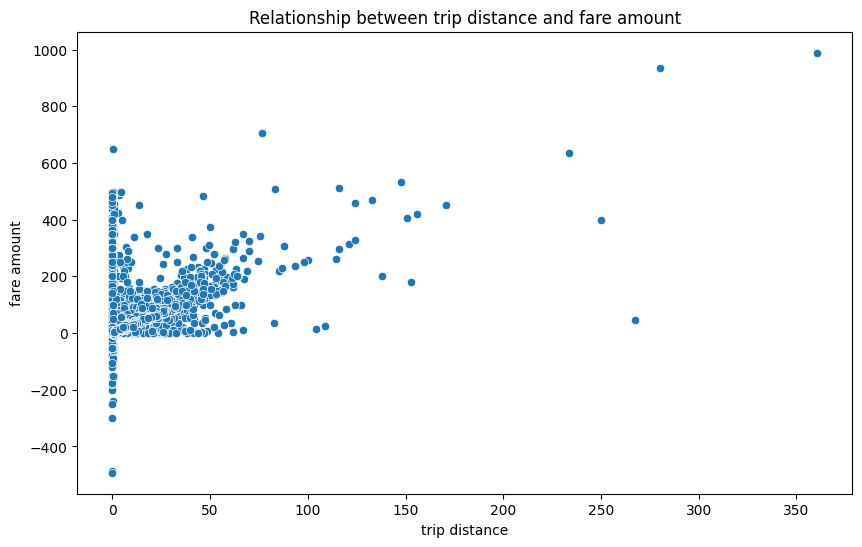

In [29]:
plot_scatter(df, 'trip distance', 'fare amount')

In [30]:
df[(df["fare amount"] >200) & (df["trip distance"] == 0)]
df[(df["fare amount"] >0) & (df["trip distance"] == 0)]

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
249,"Creative Mobile Technologies, LLC",2016-01-01 00:34:07,2016-01-01 00:34:07,N,Standard rate,"Queens,Astoria","Unknown,NV",1.00,0.00,27.00,0.50,0.50,0.00,0.00,NaN,0.30,28.30,Cash,Street-hail,NaN
378,VeriFone Inc.,2016-01-01 00:57:47,2016-01-01 00:58:04,N,Standard rate,"Bronx,Mott Haven/Port Morris","Bronx,Mott Haven/Port Morris",1.00,0.00,2.50,0.50,0.50,17.00,0.00,NaN,0.30,20.80,Credit card,Street-hail,NaN
451,VeriFone Inc.,2016-01-01 00:52:06,2016-01-01 00:55:29,N,Standard rate,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,4.00,0.50,0.50,0.00,0.00,NaN,0.30,5.30,Cash,Street-hail,NaN
774,VeriFone Inc.,2016-01-01 00:25:46,2016-01-01 00:25:52,N,Negotiated fare,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,4.00,NaN,0.00,1.20,0.00,NaN,0.00,5.20,Credit card,Dispatch,NaN
775,VeriFone Inc.,2016-01-01 00:26:50,2016-01-01 00:26:54,N,Negotiated fare,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",1.00,0.00,35.00,NaN,0.00,0.00,0.00,NaN,0.00,35.00,Cash,Dispatch,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444625,VeriFone Inc.,2016-01-31 23:46:27,2016-01-31 23:46:29,N,Standard rate,"Unknown,NV","Queens,Jamaica",1.00,0.00,2.50,0.50,0.50,0.00,0.00,NaN,0.30,3.80,Cash,Street-hail,NaN
1444822,"Creative Mobile Technologies, LLC",2016-01-31 23:00:59,2016-01-31 23:01:40,N,Negotiated fare,"Brooklyn,East New York","Brooklyn,East New York",1.00,0.00,40.00,NaN,0.00,0.00,0.00,NaN,0.00,40.00,NaN,Dispatch,NaN
1444953,VeriFone Inc.,2016-01-31 23:28:05,2016-01-31 23:28:44,N,Negotiated fare,"Brooklyn,Flatlands","Brooklyn,Flatlands",1.00,0.00,25.00,NaN,0.00,0.00,0.00,NaN,0.00,25.00,Cash,Dispatch,NaN
1445177,VeriFone Inc.,2016-01-31 23:08:15,2016-01-31 23:08:16,N,Negotiated fare,"Unknown,NV","Manhattan,Central Harlem North",1.00,0.00,12.00,NaN,0.00,0.00,0.00,NaN,0.00,12.00,Credit card,Dispatch,NaN


### Conclusion
There is a linear relation between the trip distance and the fare amount ( as the distance increases the fare amount increases), However there are a lot of values with zero distance but high fares which could indicate Data entry errors where the taxi might have traveled a certain distance, but due to technical or human error, it got recorded as 0, howeover this doesn't look like the case since the trip durations are very short meaning it could be due to cancellations fees. As for the negative fares it could be due to Cancellation Charges since the time of the trips are very short as well.

# 3 - Cleaning Data

## Tidying up column names

## Observe inconsistent data

## Findings and conclusions

## Observing Missing Data

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

## 4.11 - Findings and conclusions

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalisation 

## 4.31 - Findings and conclusions

## 4.4 - Adding more features(feature eng.)

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

## 4.6 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet